In [2]:
import dask.dataframe as dd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [3]:
application_train= dd.read_csv("../../data/application_train.csv").compute()
a = application_train.shape
print("application_train shape :({},{})".format( a[0],a[1]))

bureau= dd.read_csv("../../data/bureau.csv").compute()
a = bureau.shape
print("bureau shape :({},{})".format( a[0],a[1]))

application_train shape :(307511,122)
bureau shape :(1716428,17)


In [4]:
bureau=application_train[["SK_ID_CURR","TARGET"]].merge(bureau,on="SK_ID_CURR",how="left")

In [5]:
bureau.shape
del application_train

In [29]:
bureau.TARGET.isna().count()

1509345

<h2>TARGET / CREDIT_ACTIVE</h2>

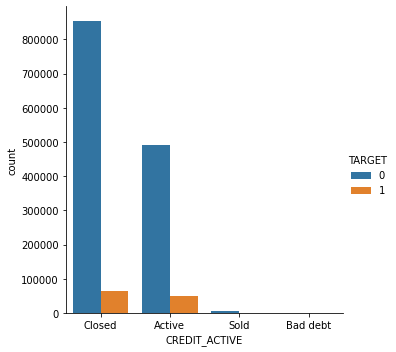

In [31]:
sns.catplot(x='CREDIT_ACTIVE', kind="count",hue='TARGET', data=bureau)

<h3><b>Interpretation :</b></h3>
<li>Le client risque a un credit qui est active</li>

<h2>TARGET / CREDIT_CURRENCY</h2>

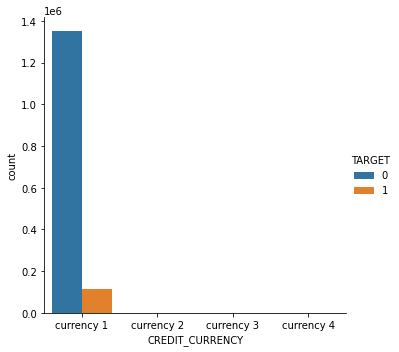

In [32]:
sns.catplot(x='CREDIT_CURRENCY', kind="count",hue='TARGET', data=bureau)

<h3><b>Interpretation :</b></h3>
Currency 1 est majoritaire , les autres variables sont negligeable ===> on peut supprimer cette colonnes 

<h2>TARGET / DAYS_CREDIT (Combien de jours avant l'application actuelle Le client a-t-il postulé pour le crédit du Credit Bureau)</h2>

In [38]:
bureau.DAYS_CREDIT=bureau.DAYS_CREDIT * -1 

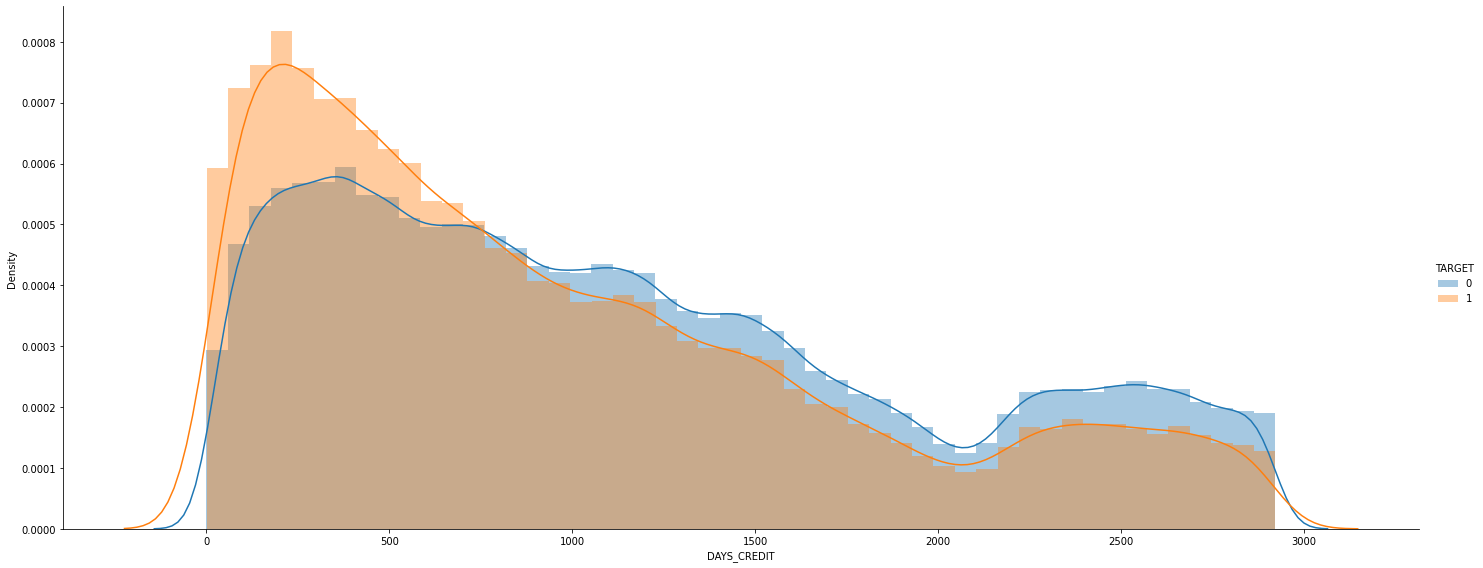

In [39]:
sns.FacetGrid(data=bureau, hue='TARGET', aspect=2.5, height=8).map(sns.distplot, 'DAYS_CREDIT').add_legend()

<h3><b>Interpretation :</b></h3>
<li>Jours > 750 => densite de la classe 1 > densite classe 2 ===> plus que la duree entre demande actuelle et demande precedente est importante plus que le client est moins risques</li>

<h2>TARGET / CREDIT_DAY_OVERDUE (Nombre de jours passés sur le crédit CB au moment de la demande de credit)</h2>

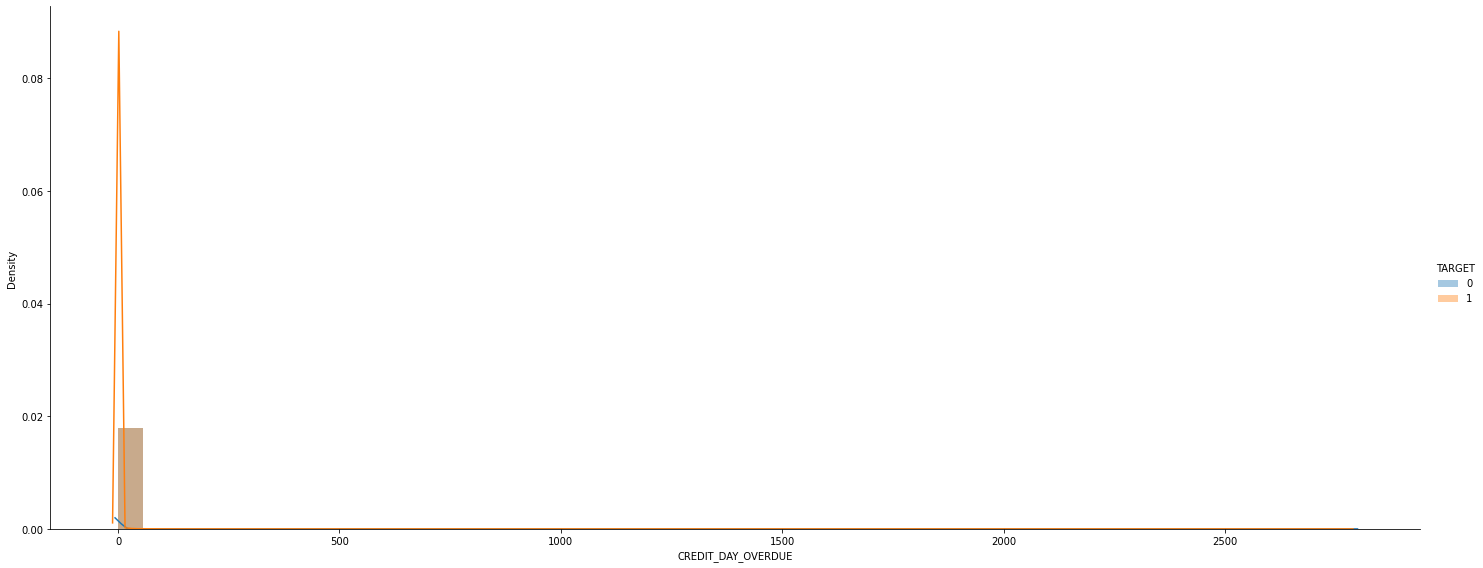

In [40]:
sns.FacetGrid(data=bureau, hue='TARGET', aspect=2.5, height=8).map(sns.distplot, 'CREDIT_DAY_OVERDUE').add_legend()

<h3><b>Interpretation :</b></h3>
Tous les valeurs sont des zeros ==> colonne inutile

<h2>TARGET / DAYS_CREDIT_ENDDATE (Durée restante du crédit CB (en jours) au moment de la demande de crédit à domicile)</h2>

In [41]:
bureau.DAYS_CREDIT_ENDDATE.describe()

count    1.376227e+06
mean     4.931322e+02
std      4.964905e+03
min     -4.206000e+04
25%     -1.144000e+03
50%     -3.340000e+02
75%      4.730000e+02
max      3.119900e+04
Name: DAYS_CREDIT_ENDDATE, dtype: float64

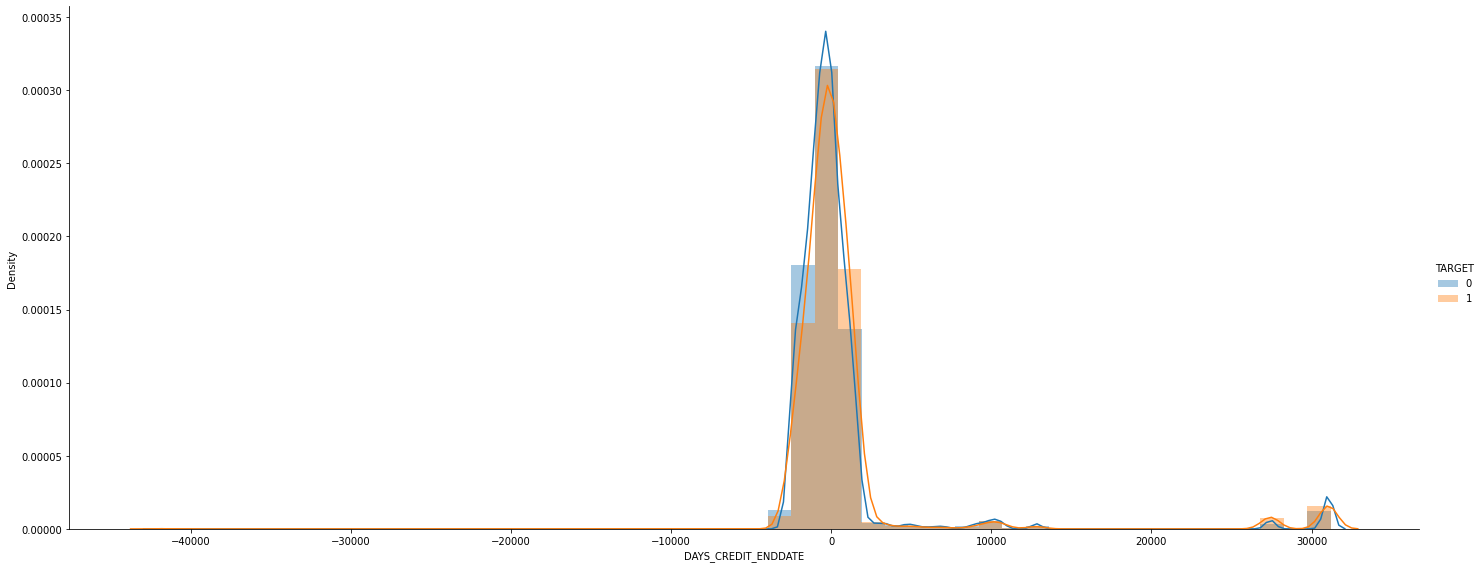

In [42]:
sns.FacetGrid(data=bureau, hue='TARGET', aspect=2.5, height=8).map(sns.distplot, 'DAYS_CREDIT_ENDDATE').add_legend()

<h3><b>Interpretation :</b></h3>
<li>Présence des outliers  -4.206000e+04 jours qui correspond à 120 années et 3.119900e+04 correspond à 90 années </li> 

<h2>TARGET / DAYS_ENDDATE_FACT (Jours depuis que le crédit CB s'est terminé au moment de la demande de crédit à domicile (uniquement pour un crédit fermé)</h2>

<h3><b>Interpretation :</b></h3>
Il semble que le pourcentage des hommes qui paient leurs credits sans probleme est plus que les femmes

In [43]:
bureau.DAYS_ENDDATE_FACT.describe()

count    920652.000000
mean      -1022.765286
std         718.371749
min      -42023.000000
25%       -1503.000000
50%        -900.000000
75%        -427.000000
max           0.000000
Name: DAYS_ENDDATE_FACT, dtype: float64

In [44]:
42023/365

115.13150684931507

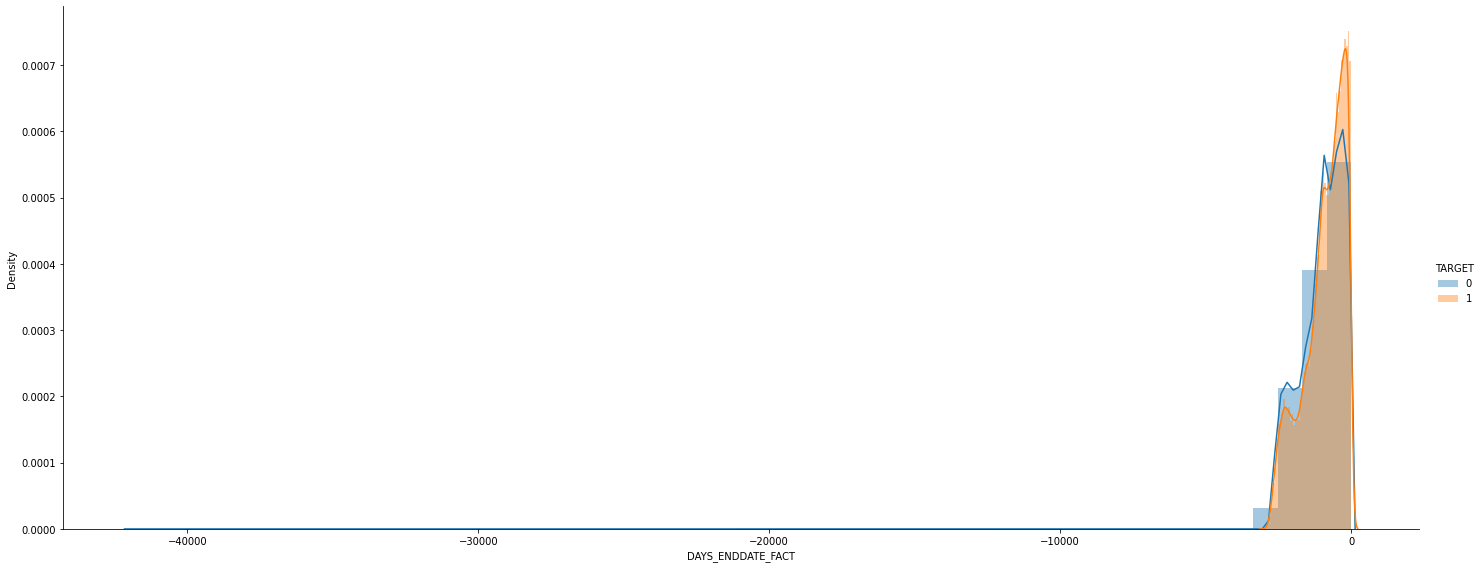

In [45]:
sns.FacetGrid(data=bureau, hue='TARGET', aspect=2.5, height=8).map(sns.distplot, 'DAYS_ENDDATE_FACT').add_legend()

<h3><b>Interpretation :</b></h3>
<li>Densite presque la meme pour les deux classes</li>
<li>Presence outliers</li>

<h2>TARGET / AMT_CREDIT_MAX_OVERDUE ( Montant maximal en souffrance sur le crédit du Bureau du crédit jusqu'à présent (à la date de demande de prêt dans notre échantillon) </h2>

In [47]:
bureau.AMT_CREDIT_MAX_OVERDUE.describe()

count    5.167800e+05
mean     3.942852e+03
std      2.196856e+05
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.159872e+08
Name: AMT_CREDIT_MAX_OVERDUE, dtype: float64

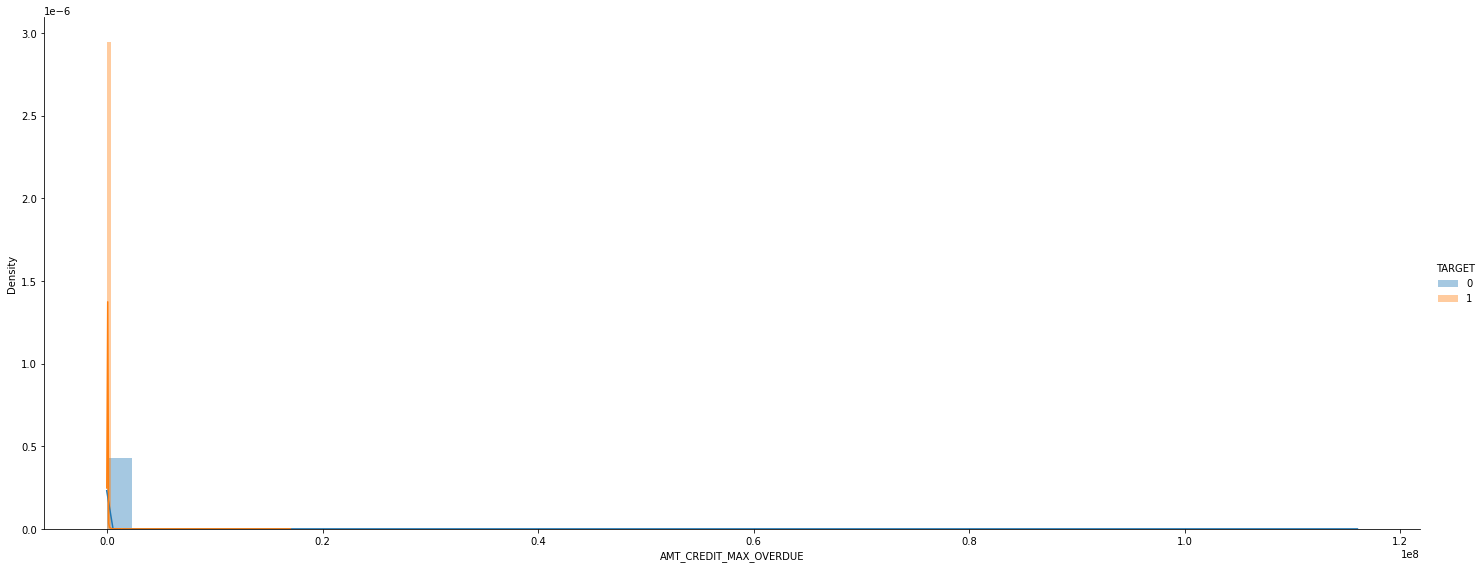

In [46]:
sns.FacetGrid(data=bureau, hue='TARGET', aspect=2.5, height=8).map(sns.distplot, 'AMT_CREDIT_MAX_OVERDUE').add_legend()

<AxesSubplot:xlabel='TARGET', ylabel='AMT_CREDIT_MAX_OVERDUE'>

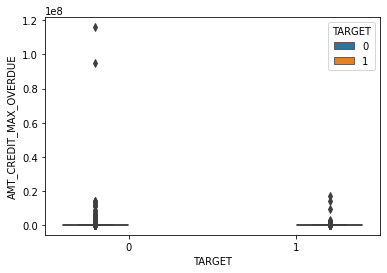

In [48]:
sns.boxplot(x='TARGET', y='AMT_CREDIT_MAX_OVERDUE',hue='TARGET', data=bureau)

<h3><b>Interpretation :</b></h3>
<li>Outliers !!! AMT_CREDIT_MAX_OVERDUE> 0.4 e8</li>

<h2>TARGET / CNT_CREDIT_PROLONG (Combien de fois le crédit du bureau de crédit a-t-il prolongé)</h2>

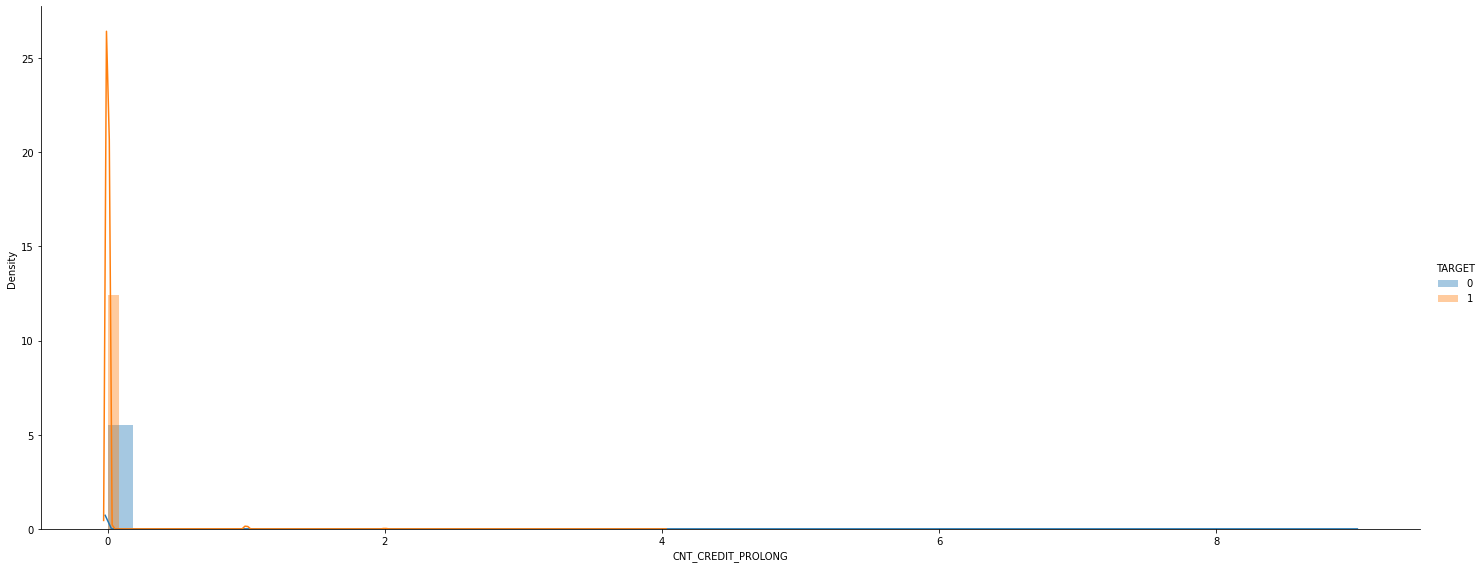

In [49]:
sns.FacetGrid(data=bureau, hue='TARGET', aspect=2.5, height=8).map(sns.distplot, 'CNT_CREDIT_PROLONG').add_legend()

<h3><b>Interpretation :</b></h3>
	99.5% des zeros ==> variable inutile

<h2>TARGET / AMT_CREDIT_SUM (Montant de crédit actuel pour le crédit du Bureau du crédit)</h2>

In [50]:
bureau.AMT_CREDIT_SUM.describe()

count    1.465322e+06
mean     3.516889e+05
std      1.078009e+06
min      0.000000e+00
25%      5.116500e+04
50%      1.246981e+05
75%      3.082500e+05
max      3.960000e+08
Name: AMT_CREDIT_SUM, dtype: float64

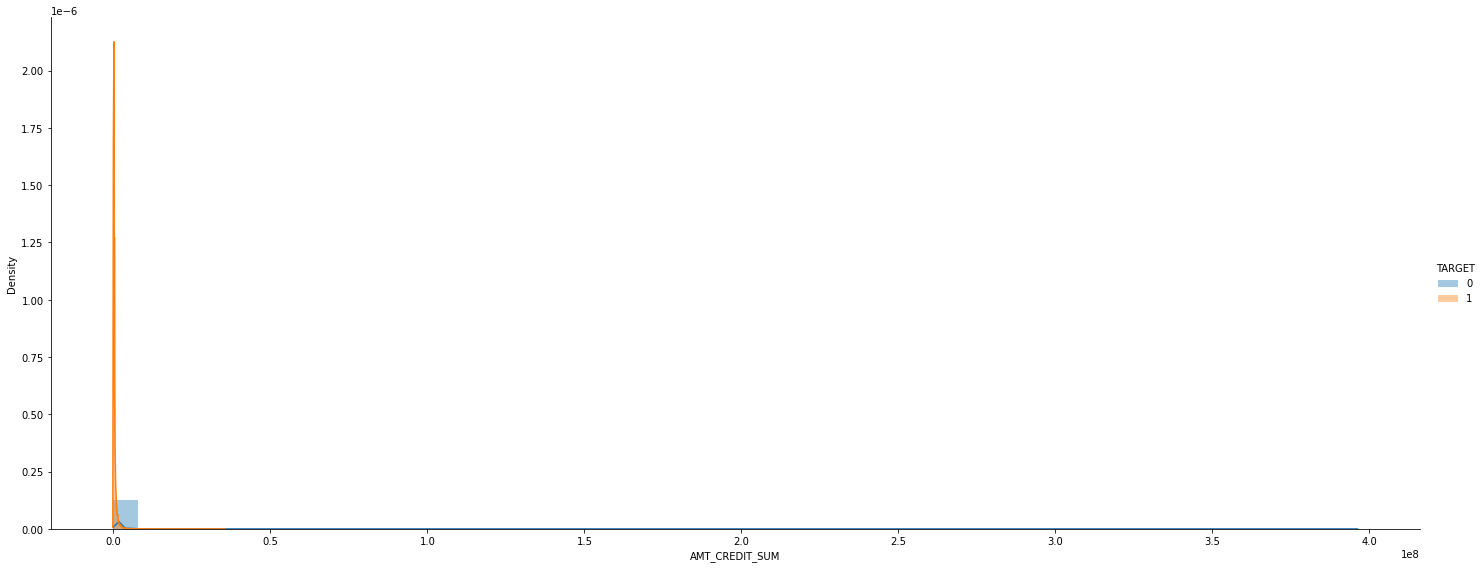

In [51]:
sns.FacetGrid(data=bureau, hue='TARGET', aspect=2.5, height=8).map(sns.distplot, 'AMT_CREDIT_SUM').add_legend()

<AxesSubplot:xlabel='TARGET', ylabel='AMT_CREDIT_SUM'>

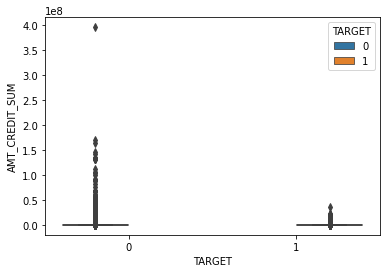

In [70]:
sns.boxplot(x='TARGET', y='AMT_CREDIT_SUM',hue='TARGET', data=bureau)

<h3><b>Interpretation :</b></h3>
<li>Outliers detect </li>

<h2>TARGET / AMT_CREDIT_SUM_DEBT (Dette actuelle sur le crédit du bureau de crédit )</h2>

In [74]:
bureau.AMT_CREDIT_SUM_DEBT.describe()

count    1.242231e+06
mean     1.358890e+05
std      6.756650e+05
min     -4.705600e+06
25%      0.000000e+00
50%      0.000000e+00
75%      3.965400e+04
max      1.701000e+08
Name: AMT_CREDIT_SUM_DEBT, dtype: float64

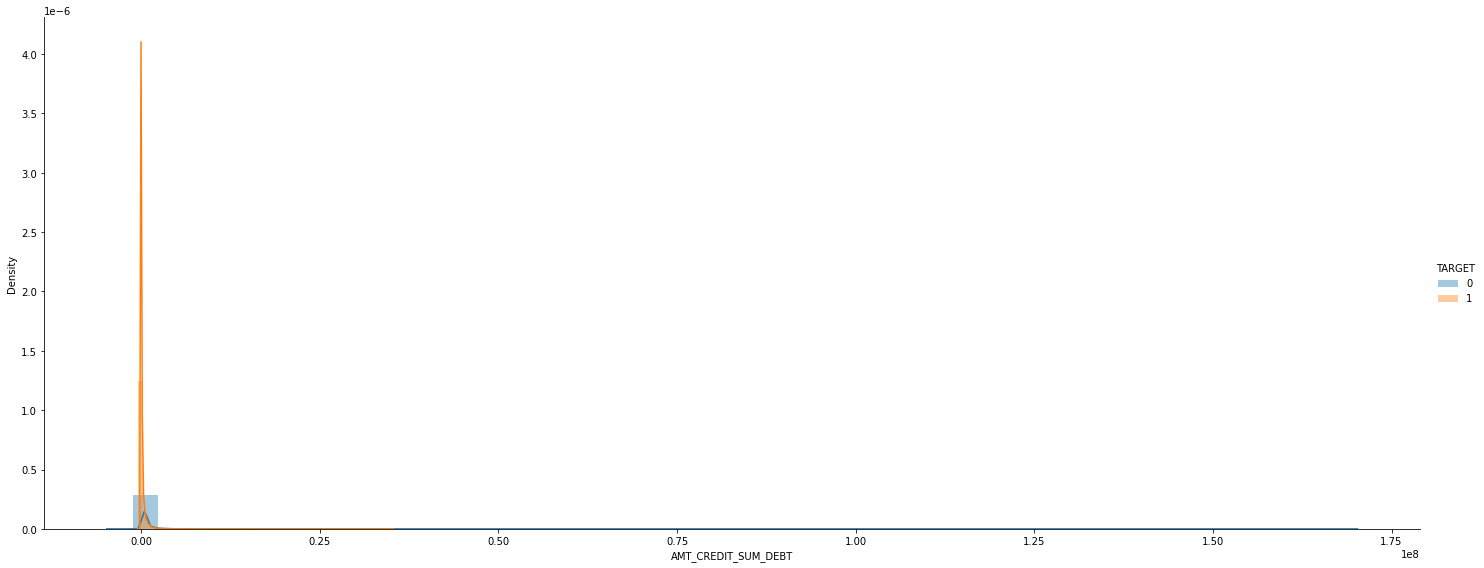

In [75]:
sns.FacetGrid(data=bureau, hue='TARGET', aspect=2.5, height=8).map(sns.distplot, 'AMT_CREDIT_SUM_DEBT').add_legend()

<AxesSubplot:xlabel='TARGET', ylabel='AMT_CREDIT_SUM_DEBT'>

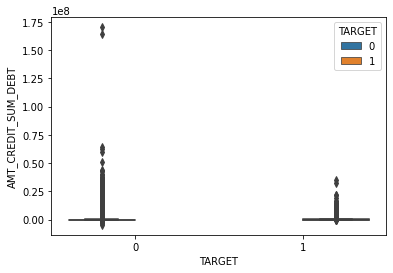

In [76]:
sns.boxplot(x='TARGET', y='AMT_CREDIT_SUM_DEBT',hue='TARGET', data=bureau)

<h3><b>Interpretation :</b></h3>
<li>Outliers valeurs >1.00 e8</li>

<h2>TARGET / AMT_CREDIT_SUM_LIMIT (Limite de crédit actuelle de la carte de crédit déclarée dans le Credit Bureau)</h2>

In [77]:
bureau.AMT_CREDIT_SUM_LIMIT.describe()

count    9.756550e+05
mean     6.363687e+03
std      4.543915e+04
min     -5.864061e+05
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      4.705600e+06
Name: AMT_CREDIT_SUM_LIMIT, dtype: float64

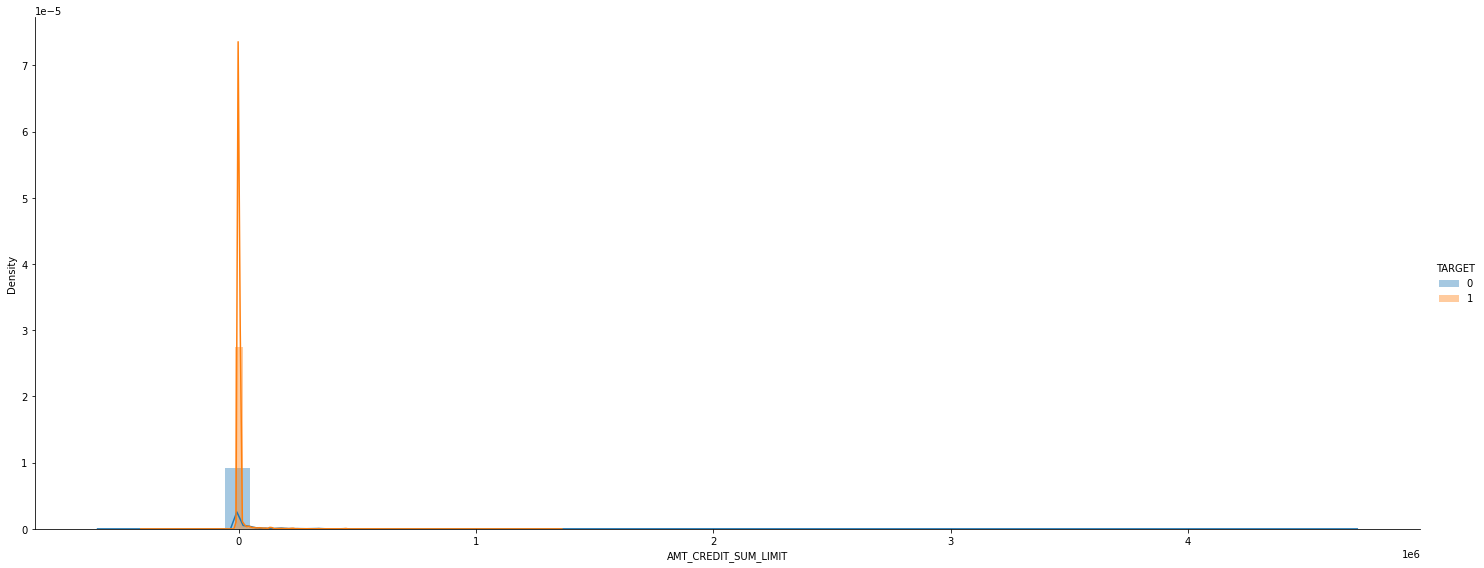

In [78]:
sns.FacetGrid(data=bureau, hue='TARGET', aspect=2.5, height=8).map(sns.distplot, 'AMT_CREDIT_SUM_LIMIT').add_legend()

<AxesSubplot:xlabel='TARGET', ylabel='AMT_CREDIT_SUM_LIMIT'>

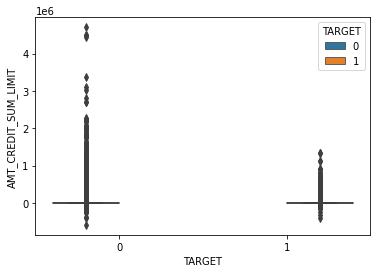

In [79]:
sns.boxplot(x='TARGET', y='AMT_CREDIT_SUM_LIMIT',hue='TARGET', data=bureau)

<h2>TARGET / AMT_CREDIT_SUM_OVERDUE (Montant actuel en souffrance sur le crédit du bureau de crédit)</h2>

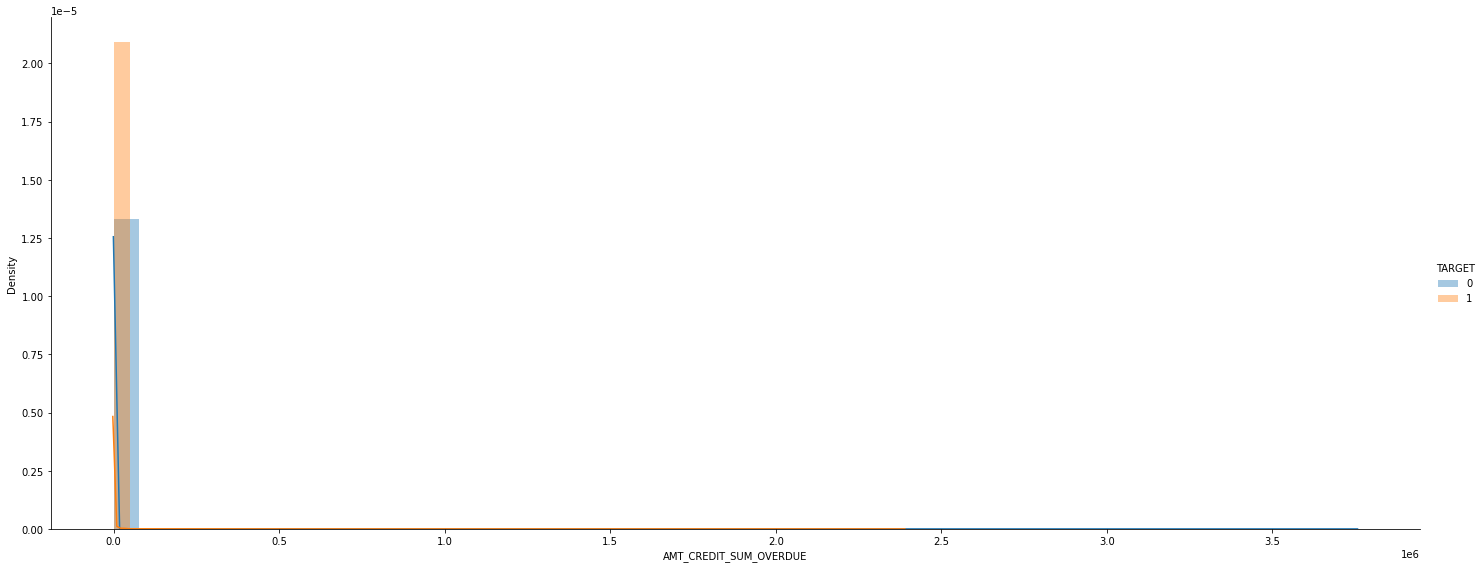

In [80]:
sns.FacetGrid(data=bureau, hue='TARGET', aspect=2.5, height=8).map(sns.distplot, 'AMT_CREDIT_SUM_OVERDUE').add_legend()

<AxesSubplot:xlabel='TARGET', ylabel='AMT_CREDIT_SUM_OVERDUE'>

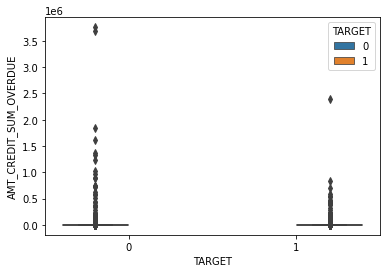

In [81]:
sns.boxplot(x='TARGET', y='AMT_CREDIT_SUM_OVERDUE',hue='TARGET', data=bureau)

<h3><b>Interpretation :</b></h3>
<li>Valeurs > 2.0e6 ==>outliers</li>

<h2>TARGET / CREDIT_TYPE</h2>

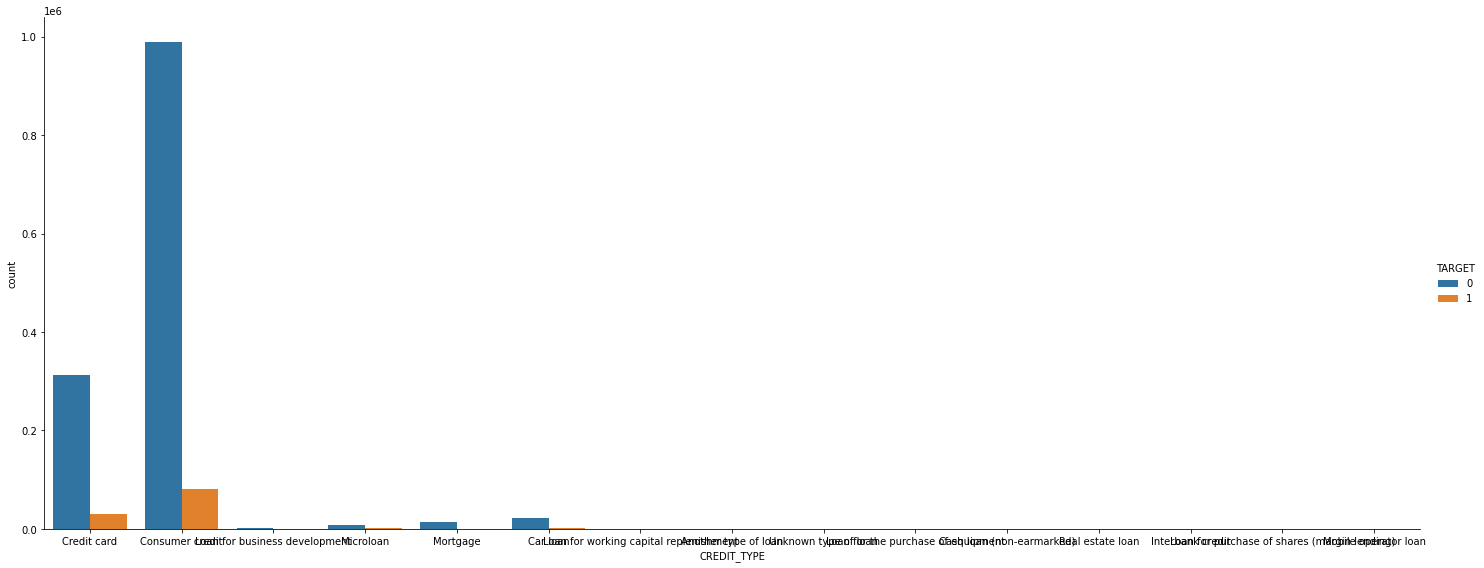

In [34]:
sns.catplot(x='CREDIT_TYPE', kind="count",hue='TARGET', data=bureau, aspect=2.5, height=8)

<h3><b>Interpretation :</b></h3>
<li>Desequilibre des classes</li>

<h2>TARGET / DAYS_CREDIT_UPDATE (Combien de jours avant la demande de prêt a fait la dernière information sur le crédit du Bureau de crédit)</h2>

In [7]:
bureau.DAYS_CREDIT_UPDATE.describe()

count    1.465325e+06
mean    -5.997869e+02
std      7.371010e+02
min     -4.194700e+04
25%     -9.040000e+02
50%     -4.060000e+02
75%     -3.300000e+01
max      3.720000e+02
Name: DAYS_CREDIT_UPDATE, dtype: float64

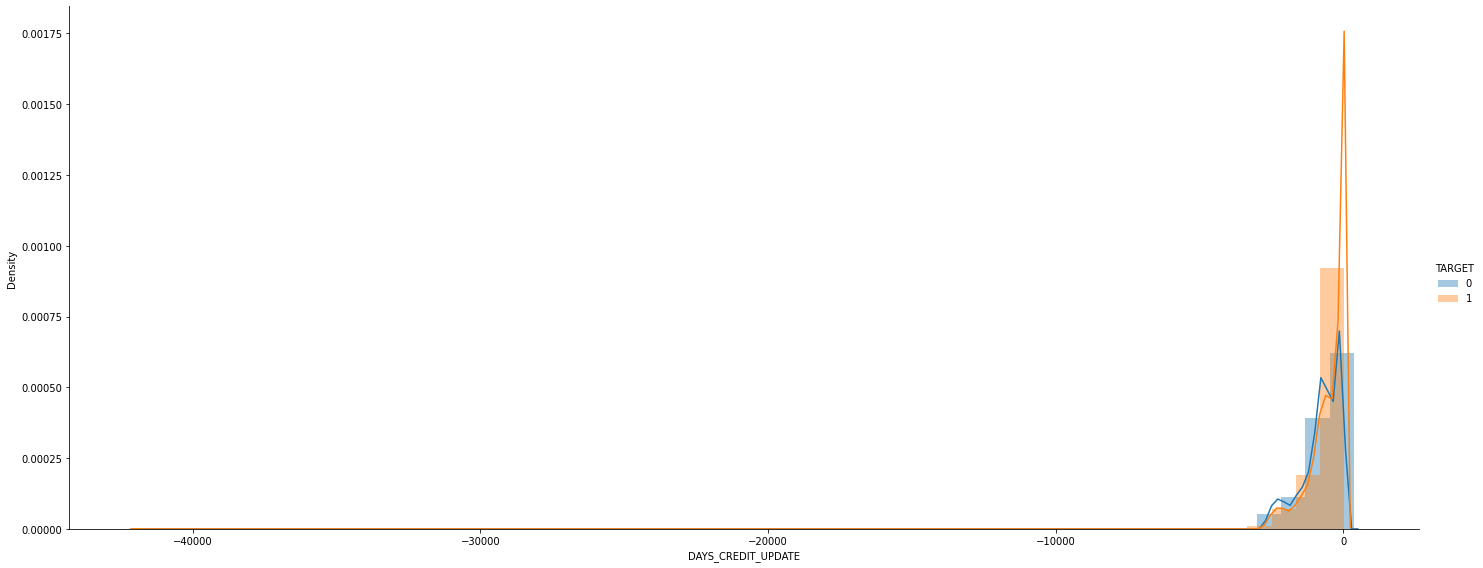

In [8]:
sns.FacetGrid(data=bureau, hue='TARGET', aspect=2.5, height=8).map(sns.distplot, 'DAYS_CREDIT_UPDATE').add_legend()

<AxesSubplot:xlabel='TARGET', ylabel='DAYS_CREDIT_UPDATE'>

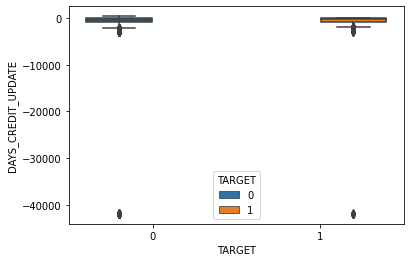

In [9]:
sns.boxplot(x='TARGET', y='DAYS_CREDIT_UPDATE',hue='TARGET', data=bureau)

<h2>TARGET / AMT_ANNUITY</h2>

In [82]:
bureau.AMT_ANNUITY.describe()

count    3.353120e+05
mean     1.576301e+04
std      2.681074e+05
min      0.000000e+00
25%      0.000000e+00
50%      6.750000e+01
75%      1.399050e+04
max      5.958668e+07
Name: AMT_ANNUITY, dtype: float64

In [10]:
sns.catplot(x='AMT_ANNUITY', kind="count",hue='TARGET', data=bureau, aspect=2.5, height=8)

<AxesSubplot:xlabel='TARGET', ylabel='AMT_ANNUITY'>

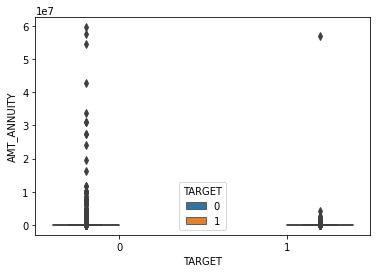

In [6]:
sns.boxplot(x='TARGET', y='AMT_ANNUITY',hue='TARGET', data=bureau)